# Instacart Frequent Itemsets

In [ ]:
library(readr)
library(dplyr)
library(tidyr)
library(arules)
library(methods)

In [2]:
orders <- read_csv('order_products__prior.csv')
products <- read_csv('products.csv')

Parsed with column specification:
cols(
  order_id = col_integer(),
  product_id = col_integer(),
  add_to_cart_order = col_integer(),
  reordered = col_integer()
)
Parsed with column specification:
cols(
  product_id = col_integer(),
  product_name = col_character(),
  aisle_id = col_integer(),
  department_id = col_integer()
)


In [3]:
baskets <- orders %>% inner_join(products, by='product_id') %>% 
group_by(order_id) %>%
summarise(basket = as.vector(list(product_name)))

transactions <- as(baskets$basket, 'transactions')

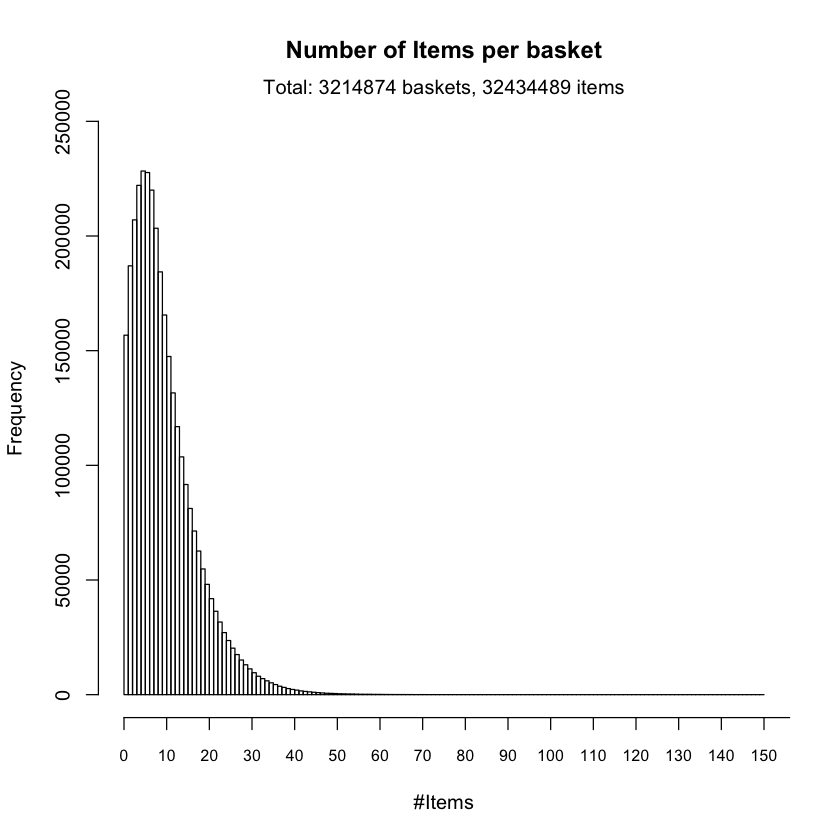

In [28]:
hist(size(transactions), breaks = 0:150, xaxt="n", ylim=c(0,250000), 
     main = "Number of Items per basket", xlab = "#Items")
axis(1, at=seq(0,160,by=10), cex.axis=0.8)
mtext(paste("Total:", length(transactions), "baskets,", sum(size(transactions)), "items"))

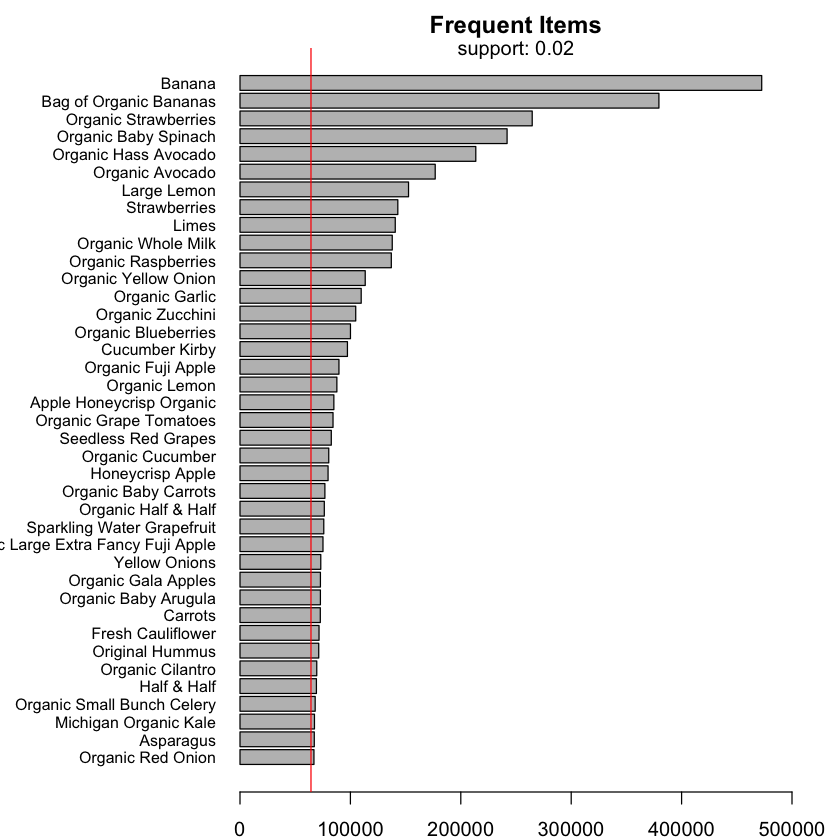

In [5]:
item_frequencies <- itemFrequency(transactions, type="a")
support <- 0.02
freq_items <- sort(item_frequencies, decreasing = F)
freq_items <- freq_items[freq_items>support*length(transactions)]

par(mar=c(2,10,2,2)); options(scipen=5)
barplot(freq_items, horiz=T, las=1, main="Frequent Items", cex.names=.8, xlim=c(0,500000))
mtext(paste("support:",support), padj = .8)
abline(v=support*length(transactions), col="red")

Top items: banana. Most are fruit and vegetables, and milk.

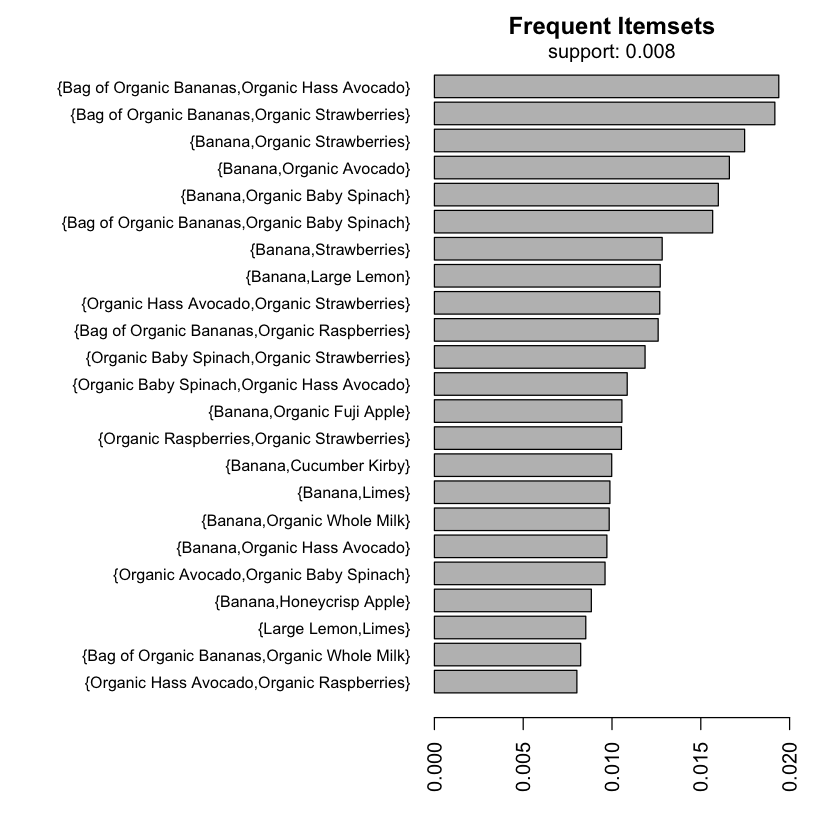

In [6]:
support <- 0.008
itemsets <- apriori(transactions, parameter = list(target = "frequent itemsets", supp=support, minlen=2), control = list(verbose = FALSE))

par(mar=c(5,18,2,2)+.1)
sets_order_supp <- DATAFRAME(sort(itemsets, by="support", decreasing = F))
barplot(sets_order_supp$support, names.arg=sets_order_supp$items, xlim=c(0,0.02), horiz = T, las = 2, cex.names = .8, main = "Frequent Itemsets")
mtext(paste("support:",support), padj = .8)

Most of frequrnt itemsets are fruit.

### Association Rules 1
support ratio = 0.00001, confidence = 0.6    
Start with a low support threshold and relatively high confidence, find as many strong rules as possible.    

In [7]:
rules1 <- apriori(transactions, parameter = list(supp = 0.00001, conf = 0.6, maxlen=3), control = list(verbose = FALSE)) 

Warning message in apriori(transactions, parameter = list(supp = 0.00001, conf = 0.6, :
“Mining stopped (time limit reached). Only patterns up to a length of 2 returned!”

In [21]:
inspect(sort(rules1, by="lift")[1:30])

     lhs                                                                          rhs                                                                    support confidence      lift count
[1]  {Moisturizing Facial Wash}                                                => {Moisturizing Non-Drying Facial Wash}                            0.00001306428  1.0000000 76544.619    42
[2]  {Moisturizing Non-Drying Facial Wash}                                     => {Moisturizing Facial Wash}                                       0.00001306428  1.0000000 76544.619    42
[3]  {Prepared Meals Simmered Beef Entree Dog Food}                            => {Prepared Meals Beef & Chicken Medley Dog Food}                  0.00001275322  0.6212121 32211.592    41
[4]  {Prepared Meals Beef & Chicken Medley Dog Food}                           => {Prepared Meals Simmered Beef Entree Dog Food}                   0.00001275322  0.6612903 32211.592    41
[5]  {Ocean Whitefish}                                      

In [22]:
inspect(sort(rules1, by="confidence")[1:30])

     lhs                                                                    rhs                                                                    support confidence         lift count
[1]  {Moisturizing Facial Wash}                                          => {Moisturizing Non-Drying Facial Wash}                            0.00001306428  1.0000000 76544.619048    42
[2]  {Moisturizing Non-Drying Facial Wash}                               => {Moisturizing Facial Wash}                                       0.00001306428  1.0000000 76544.619048    42
[3]  {Raspberry Vinaigrette Salad Snax}                                  => {Thousand Island Salad Snax}                                     0.00002146274  0.8023256 23030.139743    69
[4]  {Extra Virgin Olive Oil Spray}                                      => {All-Purpose Unbleached Flour}                                   0.00001244217  0.7843137  8055.814070    40
[5]  {2nd Foods Turkey Meat}                                             =>

Strong rules show highly relevant/similar items are often bought together. They may be less frequent in all transactions, since few of the top30 rules contain fruit and vegetable.    
Setting a low support threshold results in diverse rules.

### Association Rules 2
support ratio = 0.001, confidence = 0.4    
Raise support and lower confidence, try to find rules of more frequent items.

In [13]:
rules2 <- apriori(transactions, parameter = list(supp = 0.001, conf = 0.4, maxlen=3), control = list(verbose = FALSE)) 

Warning message in apriori(transactions, parameter = list(supp = 0.001, conf = 0.4, :
“Mining stopped (maxlen reached). Only patterns up to a length of 3 returned!”

In [23]:
inspect(sort(rules2, by="lift")[1:30])

     lhs                                                        rhs                                                         support confidence      lift count
[1]  {Non Fat Acai & Mixed Berries Yogurt}                   => {Icelandic Style Skyr Blueberry Non-fat Yogurt}         0.001220888  0.4531286 75.647888  3925
[2]  {Non Fat Raspberry Yogurt}                              => {Icelandic Style Skyr Blueberry Non-fat Yogurt}         0.002247055  0.4411064 73.640837  7224
[3]  {Total 2% Lowfat Greek Strained Yogurt with Peach,                                                                                                       
      Total 2% with Strawberry Lowfat Greek Strained Yogurt} => {Total 2% Lowfat Greek Strained Yogurt With Blueberry}  0.001161165  0.4658098 72.141821  3733
[4]  {Nonfat Icelandic Style Strawberry Yogurt}              => {Icelandic Style Skyr Blueberry Non-fat Yogurt}         0.001418096  0.4275532 71.378186  4559
[5]  {Total 2% Lowfat Greek Strained Yogurt Wi

In [24]:
inspect(sort(rules2, by="confidence")[1:30])

     lhs                                                        rhs                                                         support confidence      lift count
[1]  {Total 2% Lowfat Greek Strained Yogurt With Blueberry,                                                                                                   
      Total 2% Lowfat Greek Strained Yogurt with Peach}      => {Total 2% with Strawberry Lowfat Greek Strained Yogurt} 0.001161165  0.5942375 63.907895  3733
[2]  {Lime Sparkling Water,                                                                                                                                   
      Sparkling Lemon Water}                                 => {Sparkling Water Grapefruit}                            0.001379214  0.5188392 21.980375  4434
[3]  {Honeycrisp Apple,                                                                                                                                       
      Strawberries}                           

Some yoghurt, sparkling water and fruit are often bought together.

### Association Rules 3
support ratio = 0.005, confidence = 0.1    
Again raise the support threshold and lower confidence.

In [16]:
rules3 <- apriori(transactions, parameter = list(supp = 0.005, conf = 0.1, maxlen=3), control = list(verbose = FALSE)) 

Warning message in apriori(transactions, parameter = list(supp = 0.005, conf = 0.1, :
“Mining stopped (maxlen reached). Only patterns up to a length of 3 returned!”

In [25]:
inspect(sort(rules3, by="lift")[1:30])

     lhs                                       rhs                          support confidence     lift count
[1]  {Organic Cilantro}                     => {Limes}                  0.005463667  0.2526466 5.775753 17565
[2]  {Limes}                                => {Organic Cilantro}       0.005463667  0.1249049 5.775753 17565
[3]  {Organic Garlic}                       => {Organic Yellow Onion}   0.006865899  0.2010694 5.698983 22073
[4]  {Organic Yellow Onion}                 => {Organic Garlic}         0.006865899  0.1946026 5.698983 22073
[5]  {Limes}                                => {Large Lemon}            0.008523818  0.1948630 4.103710 27403
[6]  {Large Lemon}                          => {Limes}                  0.008523818  0.1795070 4.103710 27403
[7]  {Organic Lemon}                        => {Organic Hass Avocado}   0.006608657  0.2421307 3.644560 21246
[8]  {Organic Cucumber}                     => {Organic Hass Avocado}   0.005429762  0.2171360 3.268339 17456
[9]  {Orga

In [26]:
inspect(sort(rules3, by="confidence")[1:30])

     lhs                                       rhs                          support confidence     lift count
[1]  {Organic Fuji Apple}                   => {Banana}                 0.010558112  0.3786929 2.576259 33943
[2]  {Honeycrisp Apple}                     => {Banana}                 0.008836427  0.3561283 2.422752 28408
[3]  {Cucumber Kirby}                       => {Banana}                 0.009983906  0.3298258 2.243815 32097
[4]  {Organic Large Extra Fancy Fuji Apple} => {Bag of Organic Bananas} 0.007267470  0.3108362 2.633546 23364
[5]  {Organic Avocado}                      => {Banana}                 0.016608738  0.3019823 2.054395 53395
[6]  {Seedless Red Grapes}                  => {Banana}                 0.007650067  0.2974277 2.023410 24594
[7]  {Organic Raspberries}                  => {Bag of Organic Bananas} 0.012598628  0.2955194 2.503775 40503
[8]  {Organic Hass Avocado}                 => {Bag of Organic Bananas} 0.019391429  0.2918805 2.472945 62341
[9]  {Blue